# Graia MNIST digits example

In [1]:
# %pip install numpy
# %pip install matplotlib
import numpy as np
import matplotlib.pyplot as plt

# to get the MNIST digits
# %pip install tensorflow
import tensorflow as tf
import tensorflow.keras

2024-04-10 10:27:03.722576: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 10:27:03.725447: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-10 10:27:03.756478: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-10 10:27:04.447834: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Graia
# %pip install pyopencl
# %pip install pocl-binary-distribution
# %pip install futhark-ffi
from graia import Graia

🌄 Graia v0.0.1


In [3]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# print(train_labels[0])
# plt.imshow(train_images[0])

In [4]:
N = 1000
train_images = train_images[:N]
train_labels = train_labels[:N]
train_images = train_images.reshape(N, 28*28)

In [5]:
model = Graia(inputs=28*28, layer_nodes=16, layers=2, outputs=10, seed=37)
# plt.imshow(model.hidden_weights[0])
# print(model.hidden_weights[0])

🌄 Graia model with 12,960 parameters ready.


In [6]:
model.fit(train_images, train_labels, epochs=1)


Epoch 1/1: accuracy 6.000%


In [7]:
print("\n", model.input_weights[:2], "...")
print("\n", model.hidden_weights[0])
print("\n", model.output_weights[:2], "...")



 [[ 1  5  3 ...  1  1  1]
 [-2 -5  1 ... -2 -2  2]] ...

 [[ 1  1  1  2  5  5 -2  1  2  1  1  1 -3  1 -5  3]
 [ 5  1  3  1 -2 -5 -2 -5  1 -5 -5 -3  1  1  1 -3]
 [ 5 -3 -5  1  1 -5 -2  2  1 -2 -3  3 -3  1  3  3]
 [-5  1  1  5  1 -3  1  1  1  2  1  1  3  1  1  1]
 [ 2 -3 -5  2  1 -2 -5  1  2  2  2  1  1 -5 -2  2]
 [ 1  1  3  1 -2 -2  1  1  1  1  1 -3  1  1 -3 -3]
 [-2  3  1  2  1  1  1  1  2  5 -5  3  5  1  3  1]
 [-3  1 -2  2  1  1  1  1  1  1  2  1  1  1 -2  1]
 [-5  1  1 -2  1 -2  2  1  2  1 -2 -5  1  1  1  2]
 [ 1  1  1  1  1 -2  1  1  5  1 -2  2  2 -5  1  1]
 [ 2  1  5  1  1 -2  3  1  1 -2 -3  1  5 -2  1  1]
 [ 1  1  1  1  5  1 -2 -2 -3 -5  1  1 -3 -3  1 -3]
 [-2  2 -2  1  1  1  2  1  2 -2 -5  1 -5 -2  1  2]
 [ 3  1 -2 -2  1 -2 -3 -2  1 -2  1  2 -3  1  1 -3]
 [-3  1  5  2  1  2  3  1  1  1  5  2 -3 -2  2  1]
 [ 1  1  1  1  1  5  1  3  1  5 -2  2  1  1  1 -3]]

 [[ 1  1  1  1 -2  2  1 -3  1  3  1  3  1  2  1 -5]
 [ 1  2  1  1  1  2  1  1 -3 -5 -2  3  1  1  1  2]] ...



 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


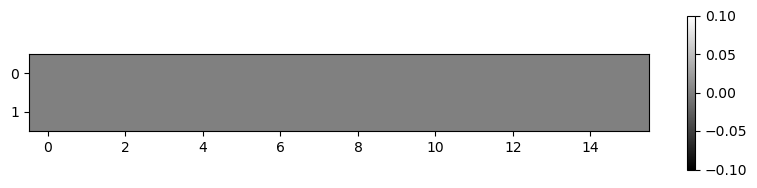


 [0 0 0 0 0 0 0 0 0 0]


In [8]:
plt.figure(figsize = (10,2))
plt.imshow(model.last_intermediate_outputs, cmap="grey")
plt.colorbar()
print("\n", model.last_intermediate_outputs[0])
plt.show()
print("\n", model.last_outputs)